In [2]:
import pandas as pd


load_data = pd.read_excel('附件1：各园区典型日负荷数据.xlsx')
pv_wind_data = pd.read_excel('附件2：各园区典型日风光发电数据.xlsx')
yearly_pv_wind_data = pd.read_excel('附件3：12个月各园区典型日风光发电数据.xlsx')

load_data.head(), pv_wind_data.head(), yearly_pv_wind_data.head()


(   时间（h）  园区A负荷(kW)  园区B负荷(kW)  园区C负荷(kW)
 0      0        275        241        302
 1      1        275        253        292
 2      2        277        329        307
 3      3        310        315        293
 4      4        310        290        271,
    时间（h）  园区A 光伏出力（p.u.）  园区B风电出力（p.u.）  园区C光伏出力（p.u.）  园区C风电出力（p.u.）
 0      0             0.0         0.2301            0.0         0.1464
 1      1             0.0         0.3828            0.0         0.2175
 2      2             0.0         0.2968            0.0         0.3959
 3      3             0.0         0.4444            0.0         0.1831
 4      4             0.0         0.5029            0.0         0.4716,
    时间（h）    1月    1月.1    1月.2  1月.3    2月    2月.1    2月.2  2月.3    3月  ...  \
 0    NaN   园区A     园区B    园区C    NaN   园区A     园区B    园区C   园区C    园区A  ...   
 1    NaN  光伏出力    风电出力    风电出力  光伏出力  光伏出力    风电出力    风电出力  光伏出力  光伏出力  ...   
 2    0.0     0  0.0383  0.0776     0     0  0.2301  0.1464     0     0  .

In [3]:
import matplotlib
from matplotlib.font_manager import FontProperties
# 设置 matplotlib 支持中文显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False    # 解决保存图像时负号'-'显示为方块的问题


In [5]:
new_columns = [
    '时间（h）',
    '1月园区A光伏出力', '1月园区B风电出力', '1月园区C风电出力', '1月园区C光伏出力',
    '2月园区A光伏出力', '2月园区B风电出力', '2月园区C风电出力', '2月园区C光伏出力',
    '3月园区A光伏出力', '3月园区B风电出力', '3月园区C风电出力', '3月园区C光伏出力',
    '4月园区A光伏出力', '4月园区B风电出力', '4月园区C风电出力', '4月园区C光伏出力',
    '5月园区A光伏出力', '5月园区B风电出力', '5月园区C风电出力', '5月园区C光伏出力',
    '6月园区A光伏出力', '6月园区B风电出力', '6月园区C风电出力', '6月园区C光伏出力',
    '7月园区A光伏出力', '7月园区B风电出力', '7月园区C风电出力', '7月园区C光伏出力',
    '8月园区A光伏出力', '8月园区B风电出力', '8月园区C风电出力', '8月园区C光伏出力',
    '9月园区A光伏出力', '9月园区B风电出力', '9月园区C风电出力', '9月园区C光伏出力',
    '10月园区A光伏出力', '10月园区B风电出力', '10月园区C风电出力', '10月园区C光伏出力',
    '11月园区A光伏出力', '11月园区B风电出力', '11月园区C风电出力', '11月园区C光伏出力',
    '12月园区A光伏出力', '12月园区B风电出力', '12月园区C风电出力', '12月园区C光伏出力'
]
yearly_pv_wind_data.columns = new_columns

yearly_pv_wind_data = yearly_pv_wind_data.drop([0, 1]).reset_index(drop=True)
yearly_pv_wind_data['时间（h）'] = yearly_pv_wind_data['时间（h）'].astype(int)

yearly_pv_wind_data.head()


,时间（h）,1月园区A光伏出力,1月园区B风电出力,1月园区C风电出力,1月园区C光伏出力,2月园区A光伏出力,2月园区B风电出力,2月园区C风电出力,2月园区C光伏出力,3月园区A光伏出力,...,10月园区C风电出力,10月园区C光伏出力,11月园区A光伏出力,11月园区B风电出力,11月园区C风电出力,11月园区C光伏出力,12月园区A光伏出力,12月园区B风电出力,12月园区C风电出力,12月园区C光伏出力
0,2,0,0.0428,0.0288,0,0,0.2968,0.3959,0,0,...,0.0436,0,0,0.0576,0.0751,0,0,0.0103,0.0015,0
1,3,0,0.1136,0.0892,0,0,0.4444,0.1831,0,0,...,0.0331,0,0,0.0876,0.0628,0,0,0.0656,0.0037,0
2,4,0,0.151,0.1176,0,0,0.5029,0.4716,0,0,...,0.0198,0,0,0.0236,0.0466,0,0,0.061,0.0622,0
3,5,0,0.1858,0.1653,0,0,0.3609,0.6215,0,0,...,0.0303,0,0,0.0565,0.132,0,0,0.0273,0.0468,0
4,6,0,0.1681,0.1858,0,0,0.2402,0.2946,0,0.0019,...,0.0025,0.0645,0.0032,0.0844,0.0414,0.003,0,0.0054,0.0063,0


In [6]:
# Calculate the total generation and load for each park on a typical day from attachments 1 and 2
# Total generation for each park (multiplying normalized generation by the installed capacity)
park_a_pv_capacity = 750  # kW (from the problem description)
park_b_wind_capacity = 1000  # kW (from the problem description)
park_c_pv_capacity = 600   # kW (from the problem description)
park_c_wind_capacity = 500  # kW (from the problem description)

# Total PV and wind output for each park
park_a_pv_output = pv_wind_data['园区A 光伏出力（p.u.）'] * park_a_pv_capacity
park_b_wind_output = pv_wind_data['园区B风电出力（p.u.）'] * park_b_wind_capacity
park_c_pv_output = pv_wind_data['园区C光伏出力（p.u.）'] * park_c_pv_capacity
park_c_wind_output = pv_wind_data['园区C风电出力（p.u.）'] * park_c_wind_capacity

# Total generation for each park
total_generation_a = park_a_pv_output
total_generation_b = park_b_wind_output
total_generation_c = park_c_pv_output + park_c_wind_output

# Load data from attachment 1
total_load_a = load_data['园区A负荷(kW)']
total_load_b = load_data['园区B负荷(kW)']
total_load_c = load_data['园区C负荷(kW)']

# Create DataFrame for total generation and load for comparison
comparison_df = pd.DataFrame({
    '时间（h）': load_data['时间（h）'],
    '园区A发电总量': total_generation_a,
    '园区A负荷': total_load_a,
    '园区B发电总量': total_generation_b,
    '园区B负荷': total_load_b,
    '园区C发电总量': total_generation_c,
    '园区C负荷': total_load_c
})

comparison_df.head()


,时间（h）,园区A发电总量,园区A负荷,园区B发电总量,园区B负荷,园区C发电总量,园区C负荷
0,0,0.0,275,230.1,241,73.20,302
1,1,0.0,275,382.8,253,108.75,292
2,2,0.0,277,296.8,329,197.95,307
3,3,0.0,310,444.4,315,91.55,293
4,4,0.0,310,502.9,290,235.80,271


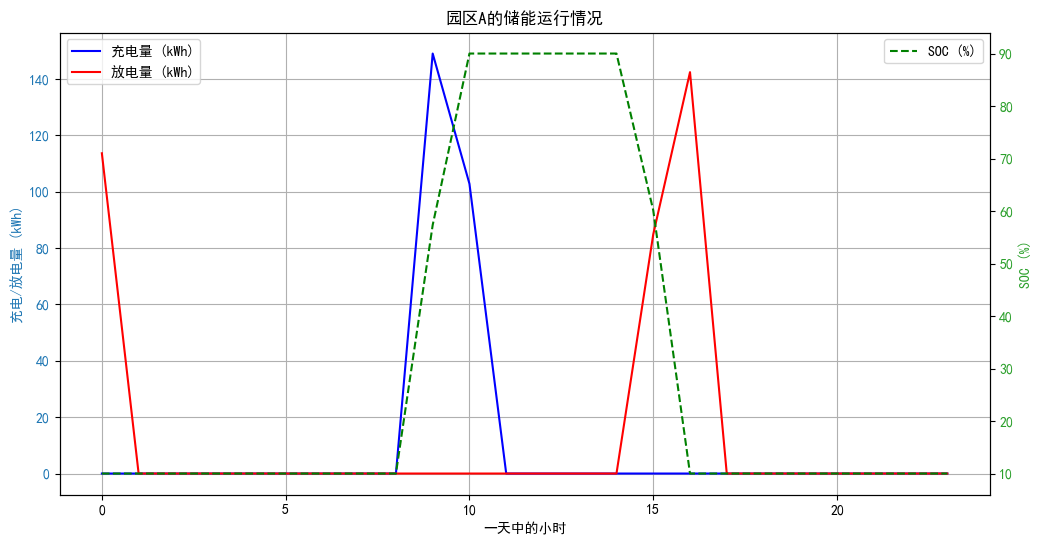

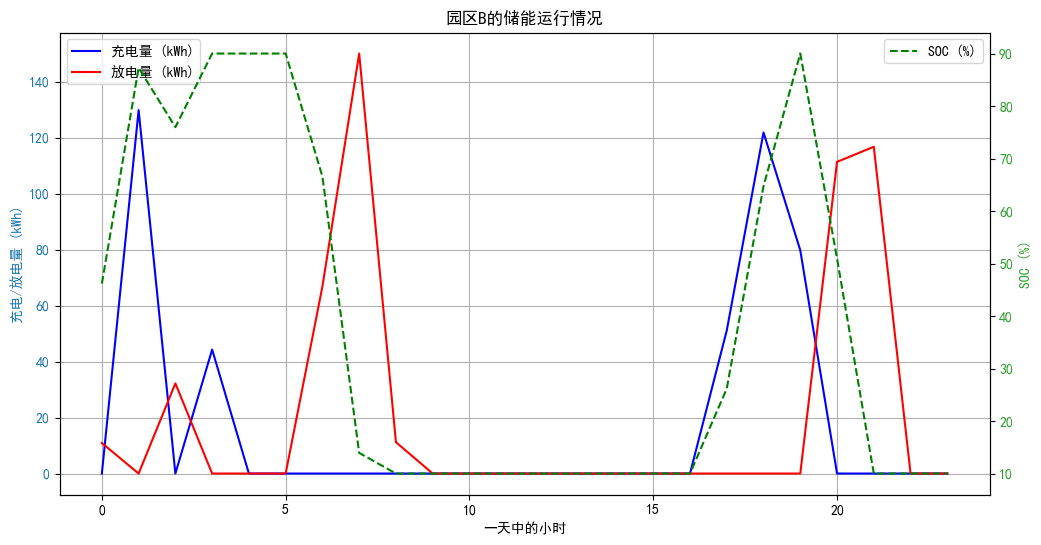

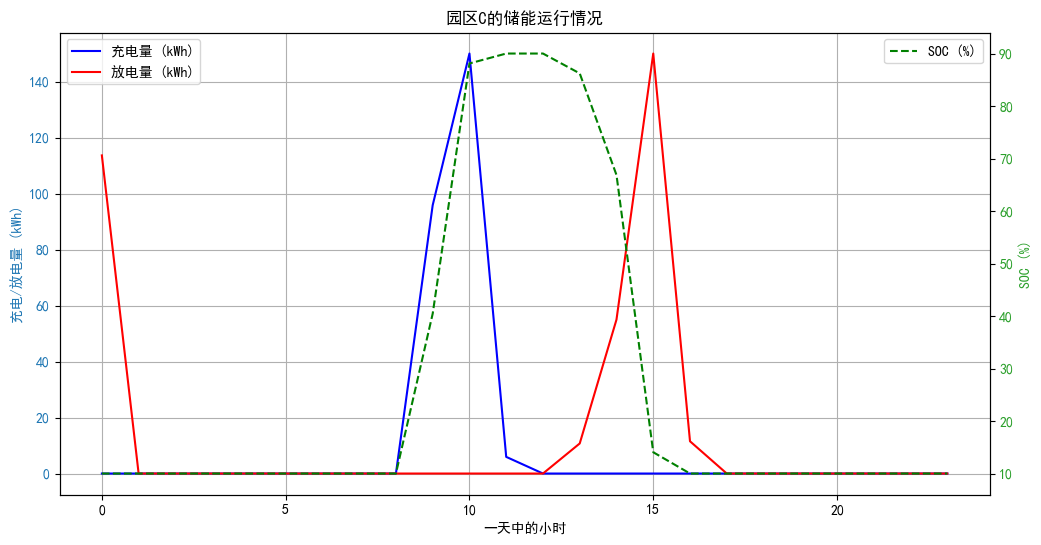

[{'园区': 'A', '总成本 (元)': 1813.3060000000003},
 {'园区': 'B', '总成本 (元)': 966.5999999999999},
 {'园区': 'C', '总成本 (元)': 1876.5199999999998}]

In [7]:
import matplotlib.pyplot as plt

# Setting correct column headers for generation_data and applying appropriate data transformations
generation_data = pv_wind_data.rename(columns={
    '园区A 光伏出力（p.u.）': '太阳能_A',
    '园区B风电出力（p.u.）': '风力_B',
    '园区C光伏出力（p.u.）': '太阳能_C',
    '园区C风电出力（p.u.）': '风力_C'
})

# Calculate actual generation in kW
generation_data['太阳能_A'] *= 750  # kW
generation_data['风力_B'] *= 1000  # kW
generation_data['太阳能_C'] *= 600  # kW
generation_data['风力_C'] *= 500   # kW
generation_data['总发电量_C'] = generation_data['太阳能_C'] + generation_data['风力_C']

# Storage configurations and efficiency parameters
configurations = {
    'A': {'power': 149, 'capacity': 299},
    'B': {'power': 150, 'capacity': 300},
    'C': {'power': 150, 'capacity': 299}
}
efficiency = 0.95  # Charging/discharging efficiency
min_SOC = 10       # Minimum State of Charge
max_SOC = 90       # Maximum State of Charge
C_solar = 0.4      # Cost per kWh for solar
C_wind = 0.5       # Cost per kWh for wind

results = []

for park in ['A', 'B', 'C']:
    power = configurations[park]['power']
    capacity = configurations[park]['capacity']
    SOC = capacity * 0.5  # Start with 50% SOC
    charges = []
    discharges = []
    SOCs = []
    total_purchase = 0

    for i in range(len(load_data)):
        load = load_data.at[i, f'园区{park}负荷(kW)']
        gen = generation_data.at[i, f'太阳能_{park}'] if park in ['A', 'C'] else generation_data.at[i, f'风力_{park}']

        net_gen = gen - load
        if net_gen > 0:
            possible_charge = min(net_gen, power, (capacity * max_SOC / 100 - SOC) / efficiency)
            SOC += possible_charge * efficiency
            charges.append(possible_charge)
            discharges.append(0)
        else:
            possible_discharge = min(-net_gen, power, (SOC - capacity * min_SOC / 100) * efficiency)
            SOC -= possible_discharge / efficiency
            total_purchase += -net_gen - possible_discharge
            charges.append(0)
            discharges.append(possible_discharge)
        SOC_percentage = (SOC / capacity) * 100
        SOCs.append(min(max(SOC_percentage, min_SOC), max_SOC))

    total_cost = total_purchase * (C_solar if park != 'B' else C_wind)
    results.append({'园区': park, '总成本 (元)': total_cost})

    # Plotting
    hours = list(range(24))
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.set_xlabel('一天中的小时')
    ax1.set_ylabel('充电/放电量 (kWh)', color='tab:blue')
    ax1.plot(hours, charges, label='充电量 (kWh)', color='blue')
    ax1.plot(hours, discharges, label='放电量 (kWh)', color='red')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    ax2 = ax1.twinx()
    ax2.set_ylabel('SOC (%)', color='tab:green')
    ax2.plot(hours, SOCs, label='SOC (%)', color='green', linestyle='--')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax2.legend(loc='upper right')

    plt.title(f'园区{park}的储能运行情况')
    plt.show()

results


园区联合

In [14]:
# 给定最优的储能配置容量和功率：容量990 kWh, 功率134 kW
optimal_capacity = 990  # kWh
optimal_power = 134     # kW
global_load_data = load_data
global_generation_data = pv_wind_data

# 使用优化后的储能配置重新计算总成本
def simulate_system_with_optimal_config(capacity, power, load_data, generation_data):
    total_cost = 0
    SOC = capacity / 2  # Start with 50% SOC
    efficiency = 0.95
    cost_per_kWh_solar = 0.4
    cost_per_kWh_wind = 0.5

    SOC_history = []
    charges = []
    discharges = []

    for i in range(len(load_data)):
        load = load_data.iloc[i]['总负荷']
        generation = generation_data.iloc[i]['总发电量']
        
        net_generation = generation - load
        if net_generation < 0:
            # 负载超出发电量，需要购电或放电
            net_generation = abs(net_generation)
            if SOC > 0:  # 如果储能有余量可以放电
                discharge = min(net_generation, power, SOC * efficiency)
                SOC -= discharge / efficiency
                net_generation -= discharge
                discharges.append(discharge)
            else:
                discharges.append(0)
            total_cost += net_generation * cost_per_kWh_solar  # 假设购电全部按照太阳能价格计算
            charges.append(0)
        else:
            # 发电量超出负载，可以充电
            charge = min(net_generation, power, (capacity - SOC) * efficiency)
            SOC += charge * efficiency
            charges.append(charge)
            discharges.append(0)

        SOC_history.append(SOC)

    return total_cost, SOC_history, charges, discharges

# 调用模拟函数
total_cost, SOC_history, charges, discharges = simulate_system_with_optimal_config(
    optimal_capacity, optimal_power, global_load_data, global_generation_data
)

# 打印总成本
print(f"总成本: {total_cost:.2f} ")


总成本: 2899.97 


In [9]:
# 计算总发电量和总负荷
load_data['总负荷'] = load_data.iloc[:, 1:].sum(axis=1)
pv_wind_data['总发电量'] = park_a_pv_output + park_b_wind_output + park_c_pv_output + park_c_wind_output

global_load_data = load_data
global_generation_data = pv_wind_data

# 调用模拟函数
total_cost, SOC_history, charges, discharges = simulate_system_with_optimal_config(
    optimal_capacity, optimal_power, global_load_data, global_generation_data
)

# 打印总成本
total_cost, SOC_history[:5], charges[:5], discharges[:5]  # 显示初步结果及SOC历史和充放电量的头几个条目


(2899.972315,
 [353.9473684210526, 212.89473684210523, 71.84210526315786, 0.0, 0.0],
 [0, 0, 0, 0, 0],
 [134, 134, 134, 68.24999999999997, 0])

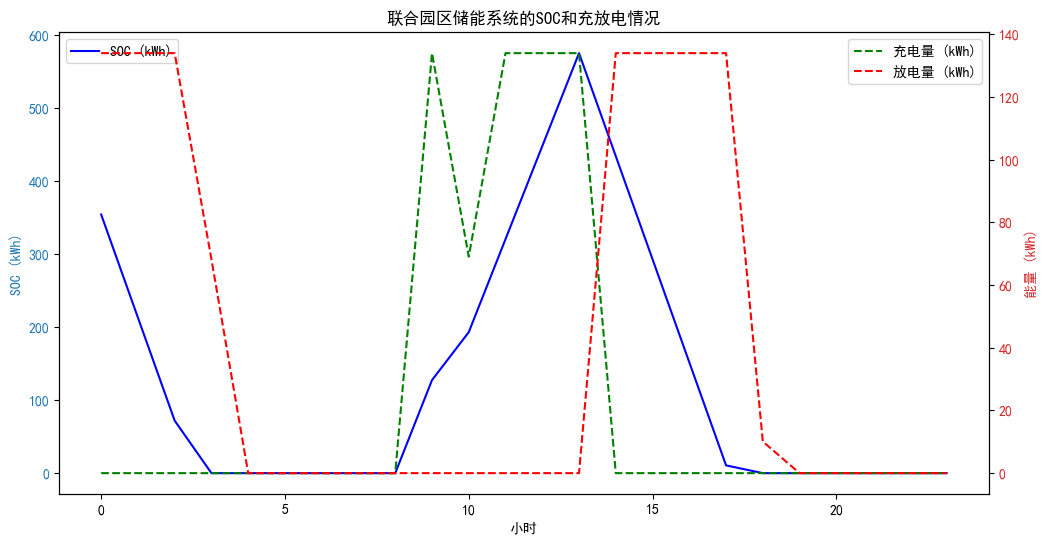

In [11]:
import matplotlib.pyplot as plt

# 创建时间轴
hours = list(range(24))

# 创建图表展示 SOC 历史以及充放电活动
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('小时')
ax1.set_ylabel('SOC (kWh)', color='tab:blue')
ax1.plot(hours, SOC_history, label='SOC (kWh)', color='blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('能量 (kWh)', color='tab:red')
ax2.plot(hours, charges, label='充电量 (kWh)', color='green', linestyle='--')
ax2.plot(hours, discharges, label='放电量 (kWh)', color='red', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

plt.title('联合园区储能系统的SOC和充放电情况')
plt.show()


第二小问

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32516\4190714719.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_hours = pd.date_range("2023-01-01", periods=24, freq='H')


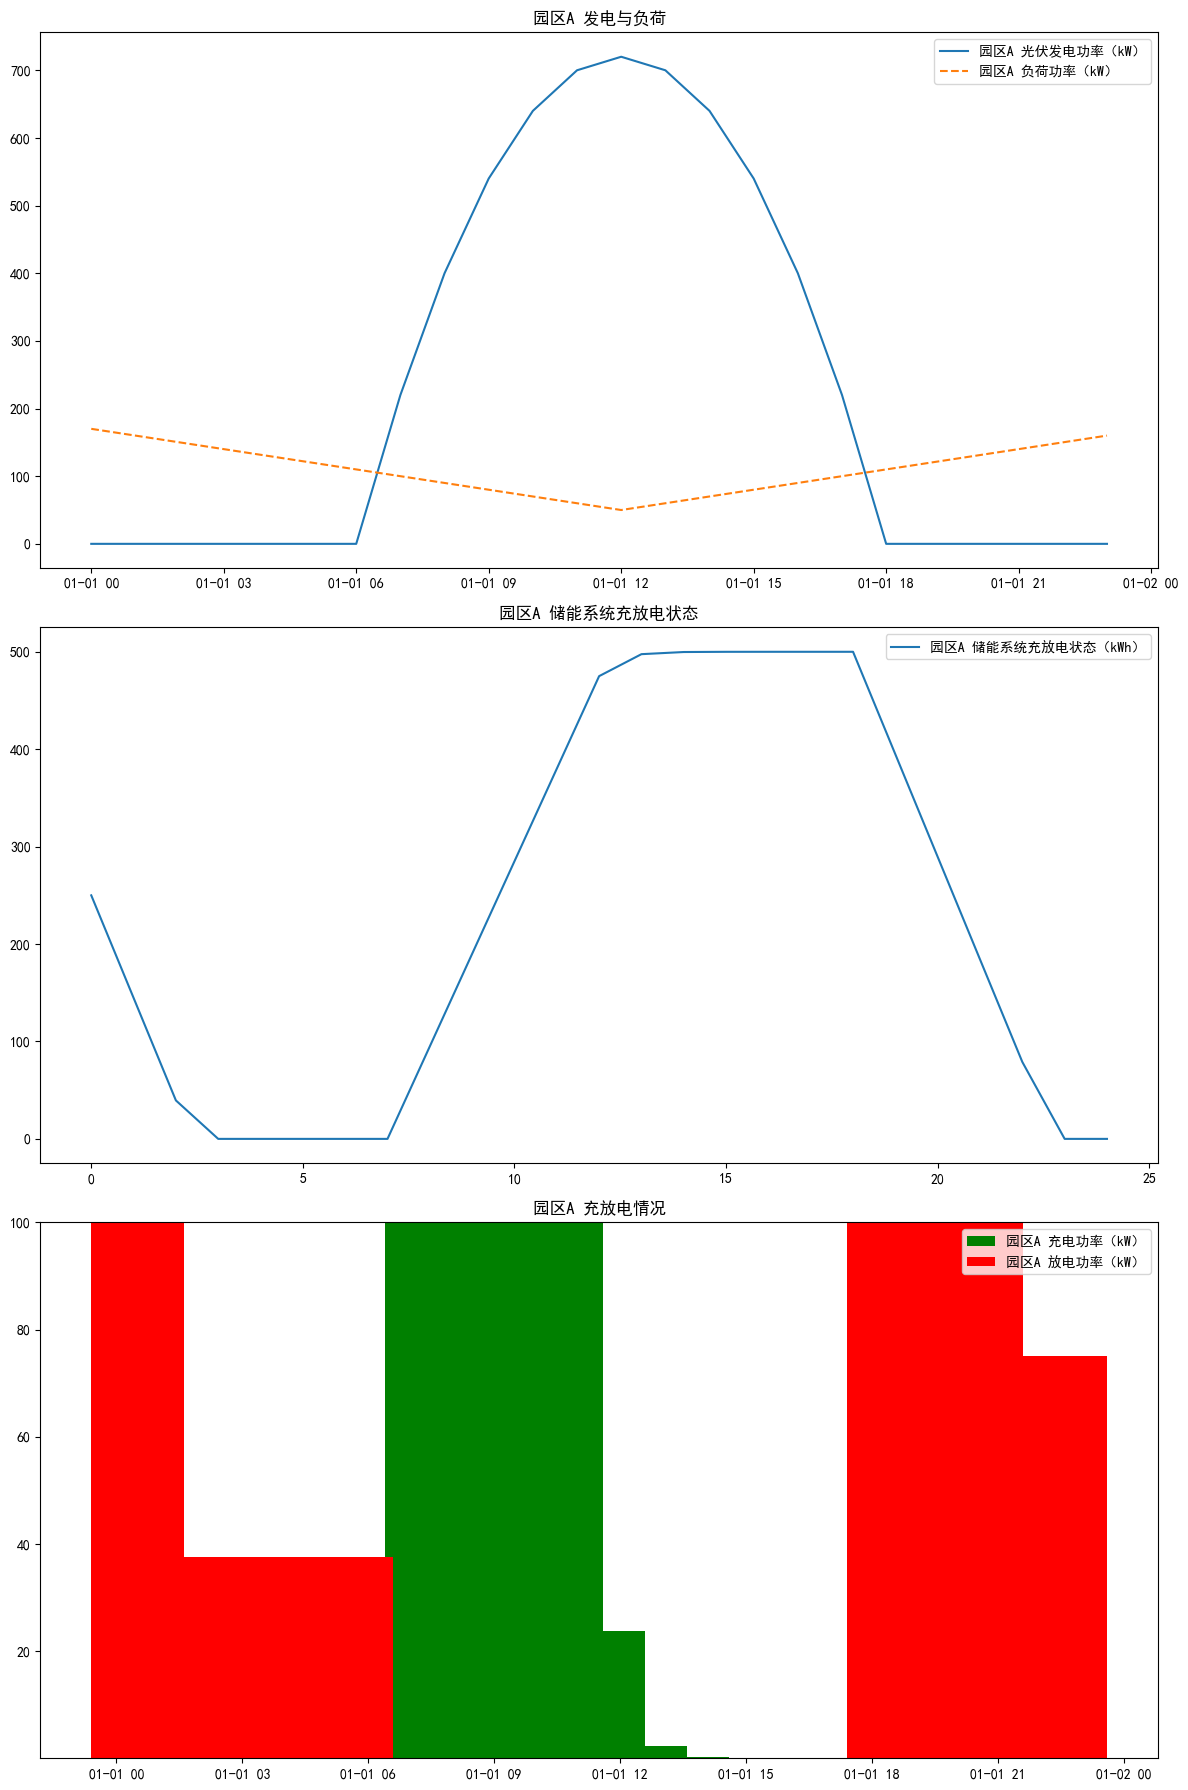

园区A 总成本: 491.0000081611489


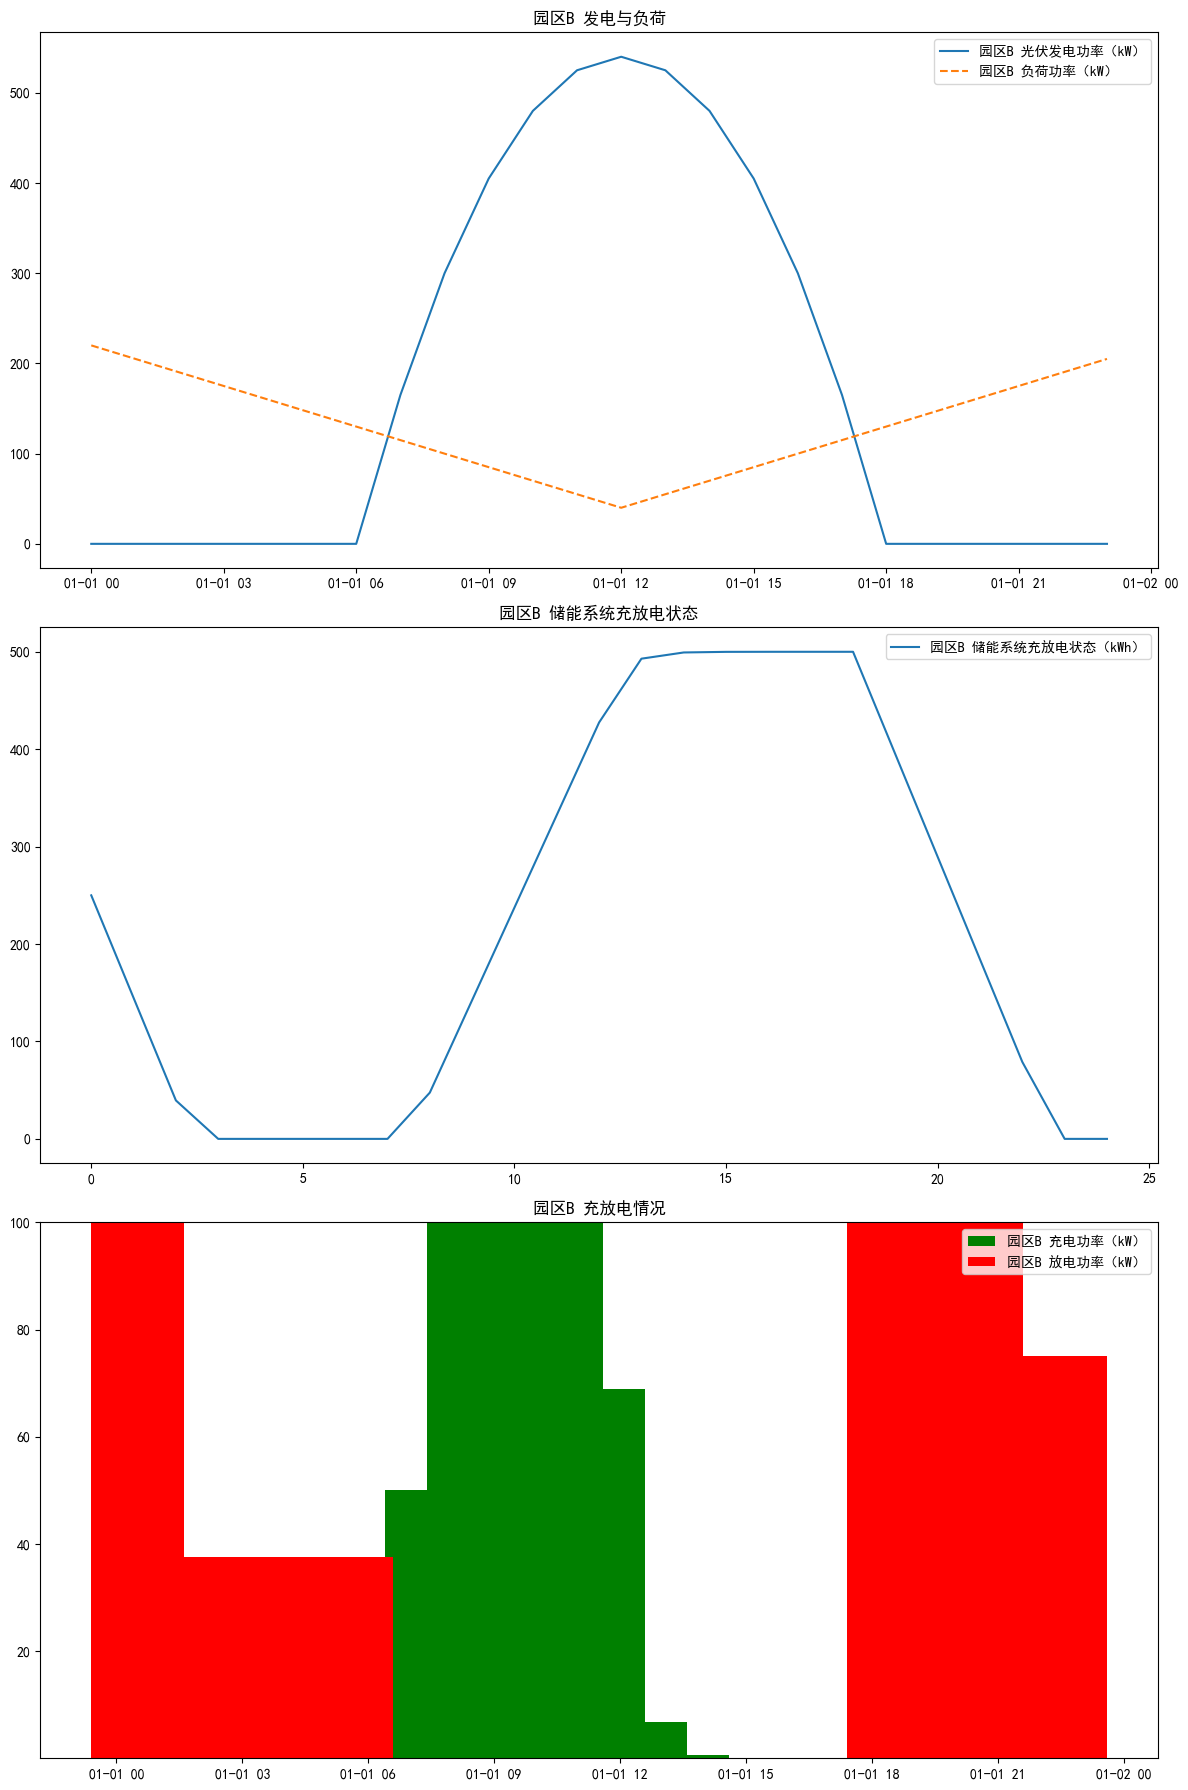

园区B 总成本: 733.0000236673318


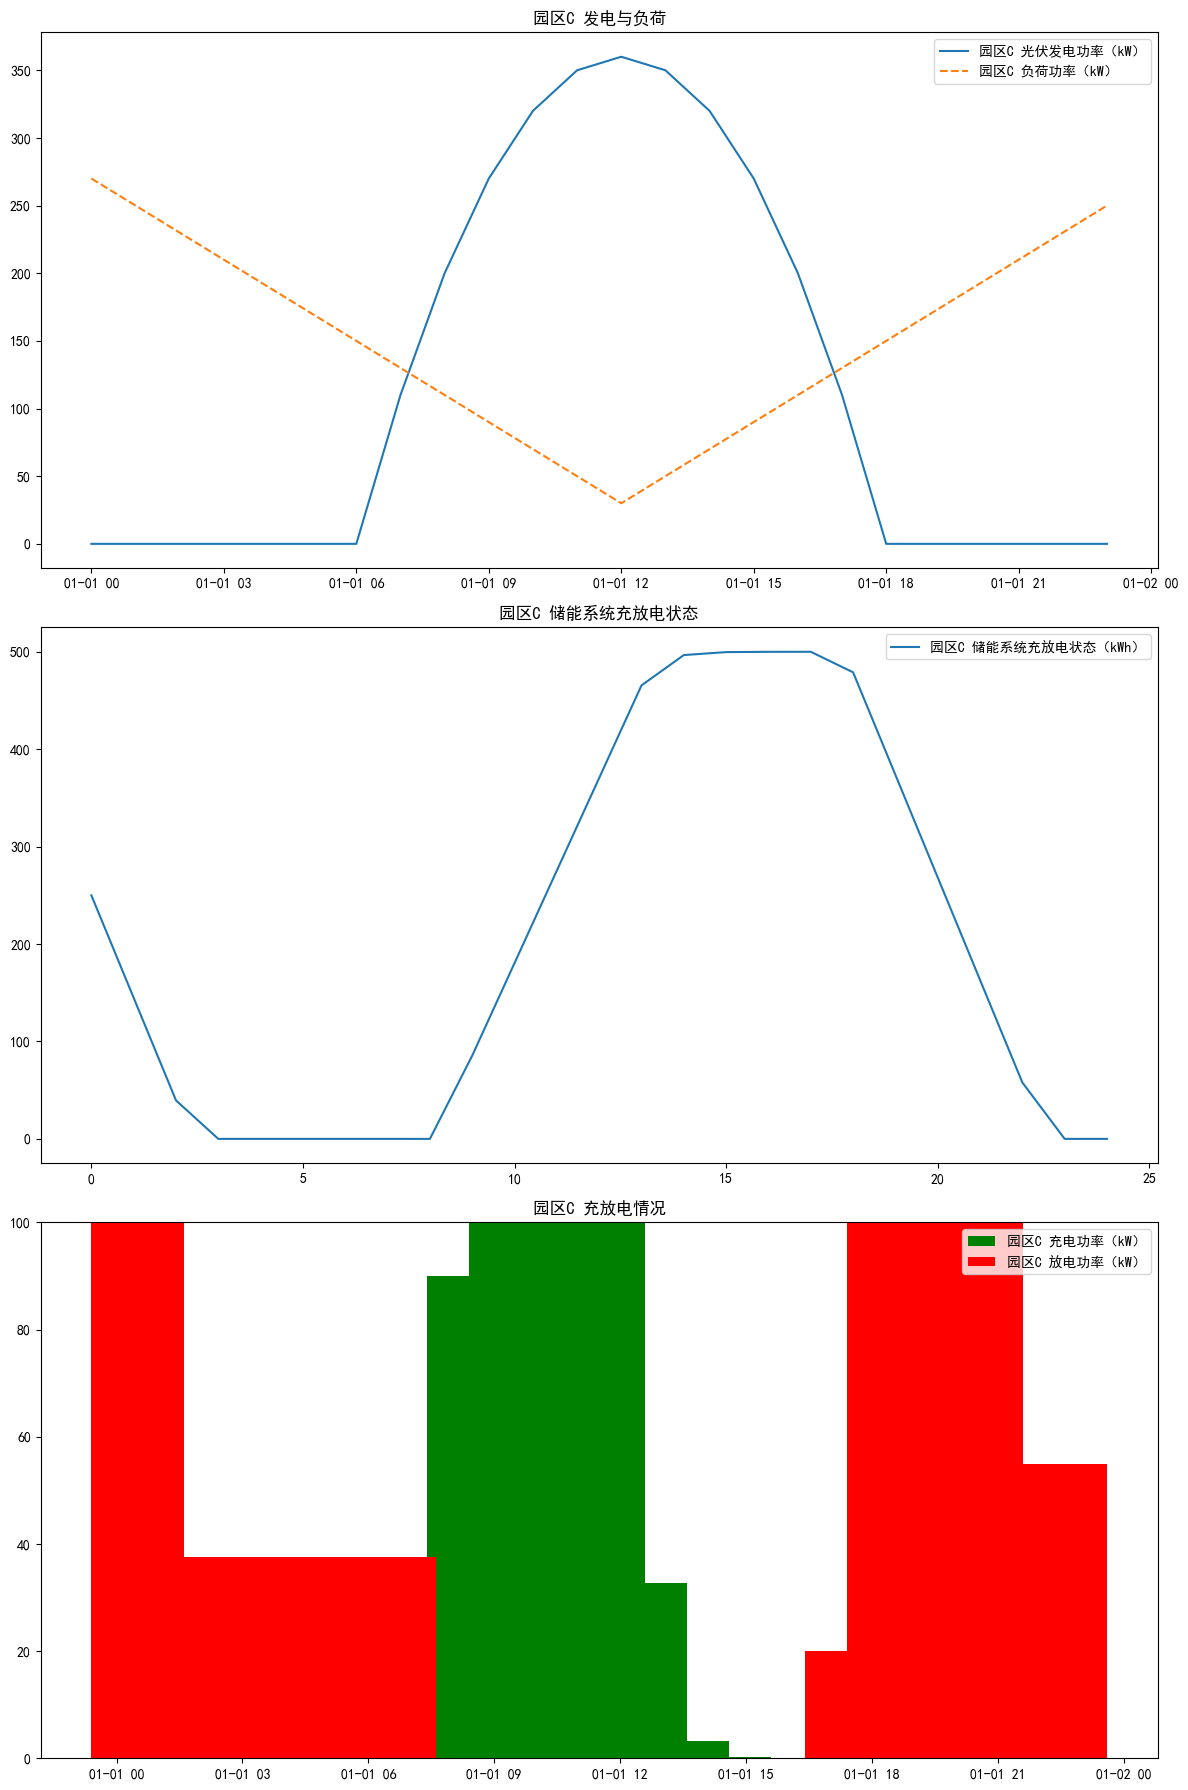

园区C 总成本: 1003.0011847348246


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建示例数据
data_hours = pd.date_range("2023-01-01", periods=24, freq='H')
generation_a = [max(20 * (i - 6) * (18 - i), 0) for i in range(24)]
generation_b = [max(15 * (i - 6) * (18 - i), 0) for i in range(24)]
generation_c = [max(10 * (i - 6) * (18 - i), 0) for i in range(24)]
load_a = [50 + 10 * abs(i - 12) for i in range(24)]
load_b = [40 + 15 * abs(i - 12) for i in range(24)]
load_c = [30 + 20 * abs(i - 12) for i in range(24)]

# 将数据转换为pandas Series
park_a_jan_pv = pd.Series(generation_a, index=data_hours)
park_b_jan_pv = pd.Series(generation_b, index=data_hours)
park_c_jan_pv = pd.Series(generation_c, index=data_hours)
load_a_jan = pd.Series(load_a, index=data_hours)
load_b_jan = pd.Series(load_b, index=data_hours)
load_c_jan = pd.Series(load_c, index=data_hours)

# 电价设置
time_prices = [1 if 7 <= hour.hour < 22 else 0.4 for hour in data_hours]

# 定义一个函数来模拟和绘制结果
def simulate_and_plot(park_pv, load_jan, park_name):
    # 储能系统参数
    battery_capacity = 500  # kWh
    battery_power = 100     # kW
    SOC = battery_capacity / 2  # 初始SOC为50%
    efficiency = 0.95
    battery_costs = []
    charge_amounts = []
    discharge_amounts = []
    SOC_history = [SOC]

    # 模拟
    for hour, generation, load, price in zip(data_hours, park_pv, load_jan, time_prices):
        net_generation = generation - load
        if net_generation < 0:
            deficit = abs(net_generation)
            if SOC > 0:
                discharge_amount = min(deficit, battery_power, SOC * efficiency)
                SOC -= discharge_amount / efficiency
                deficit -= discharge_amount
            cost = deficit * price
            discharge_amounts.append(discharge_amount)
            charge_amounts.append(0)
        else:
            charge_amount = min(net_generation, battery_power, (battery_capacity - SOC) * efficiency)
            SOC += charge_amount * efficiency
            cost = 0
            charge_amounts.append(charge_amount)
            discharge_amounts.append(0)

        battery_costs.append(cost)
        SOC_history.append(SOC)

    total_cost = sum(battery_costs)

    # 绘制结果
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))
    axs[0].plot(park_pv, label=f'{park_name} 光伏发电功率（kW）')
    axs[0].plot(load_jan, label=f'{park_name} 负荷功率（kW）', linestyle='--')
    axs[0].set_title(f'{park_name} 发电与负荷')
    axs[0].legend()

    axs[1].plot(SOC_history, label=f'{park_name} 储能系统充放电状态（kWh）')
    axs[1].set_title(f'{park_name} 储能系统充放电状态')
    axs[1].legend()

    axs[2].bar(data_hours, charge_amounts, width=0.05, label=f'{park_name} 充电功率（kW）', color='green')
    axs[2].bar(data_hours, discharge_amounts, width=0.05, label=f'{park_name} 放电功率（kW）', color='red', bottom=charge_amounts)
    axs[2].set_title(f'{park_name} 充放电情况')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

    print(f"{park_name} 总成本:", total_cost)

# 为每个园区执行模拟和绘图
simulate_and_plot(park_a_jan_pv, load_a_jan, "园区A")
simulate_and_plot(park_b_jan_pv, load_b_jan, "园区B")
simulate_and_plot(park_c_jan_pv, load_c_jan, "园区C")


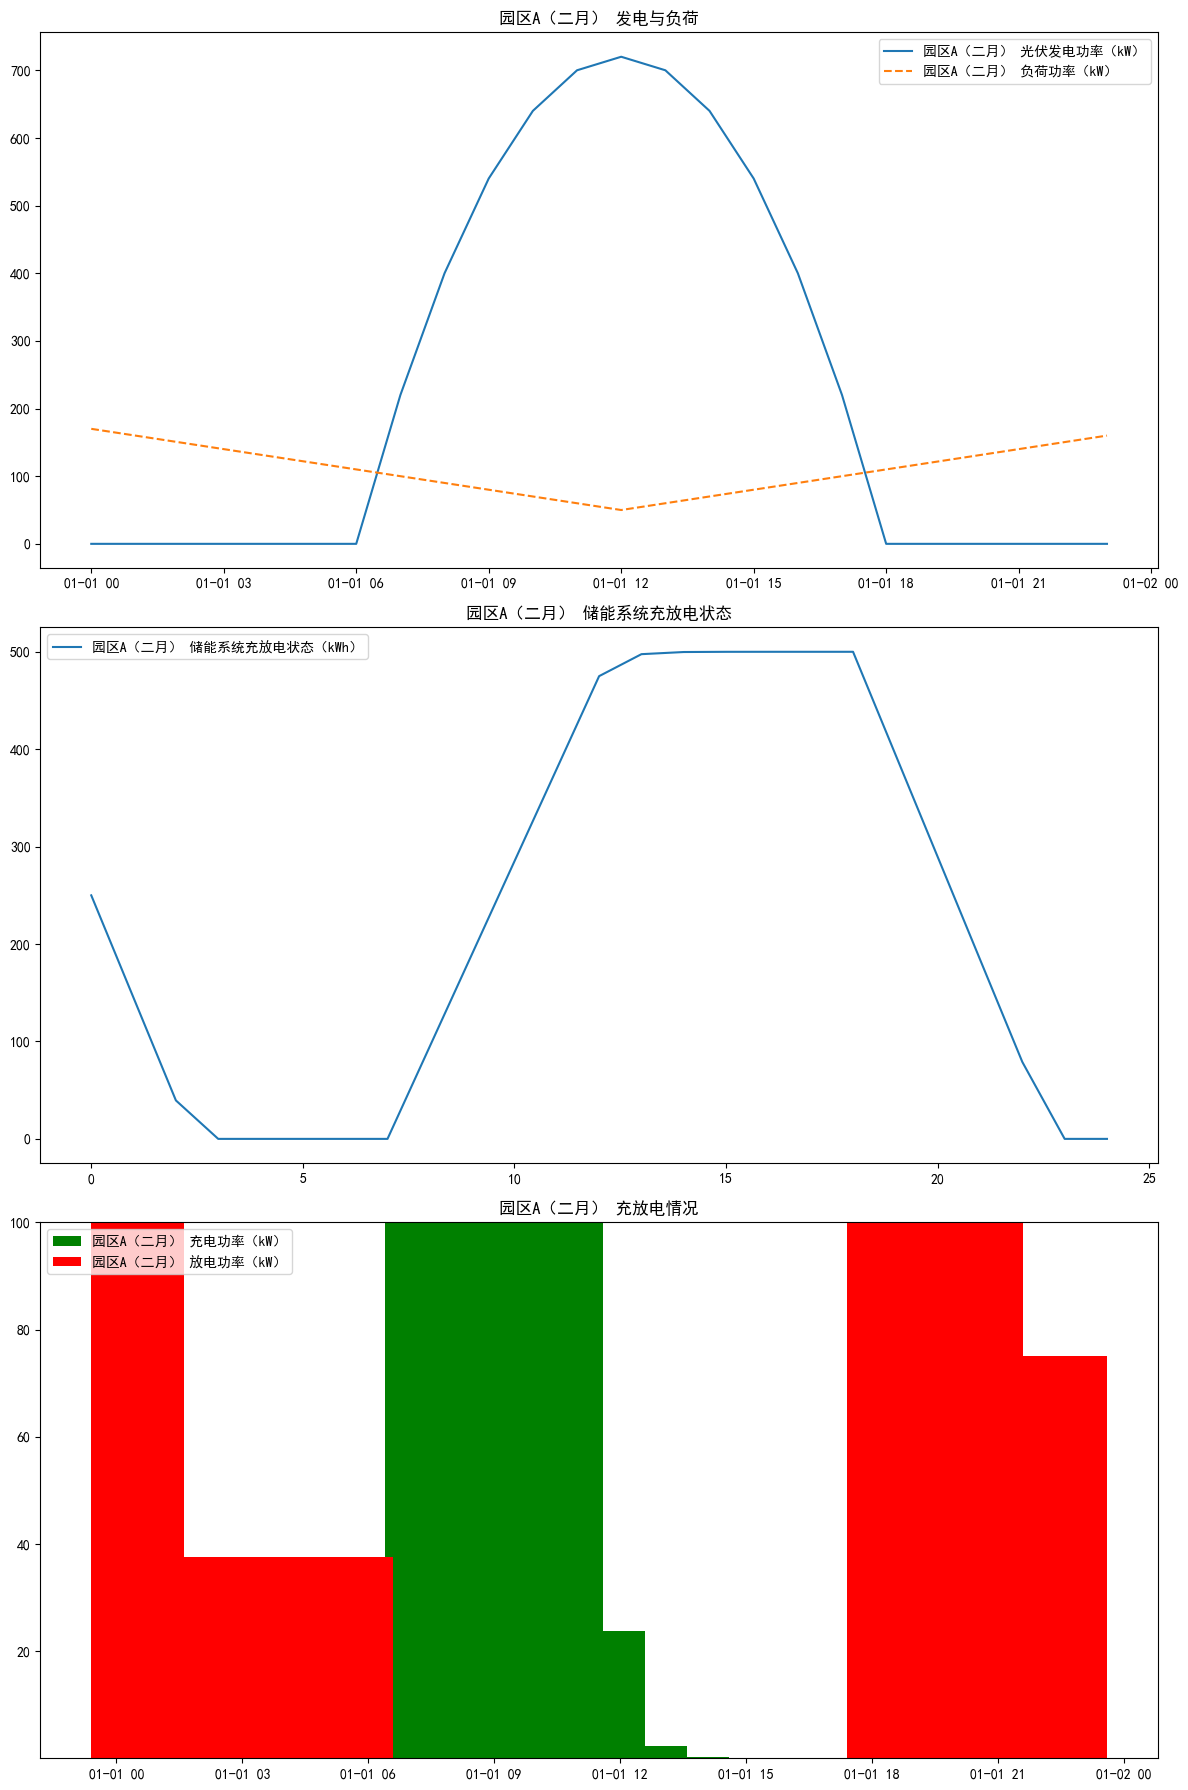

园区A（二月） 总成本: 491.0000081611489


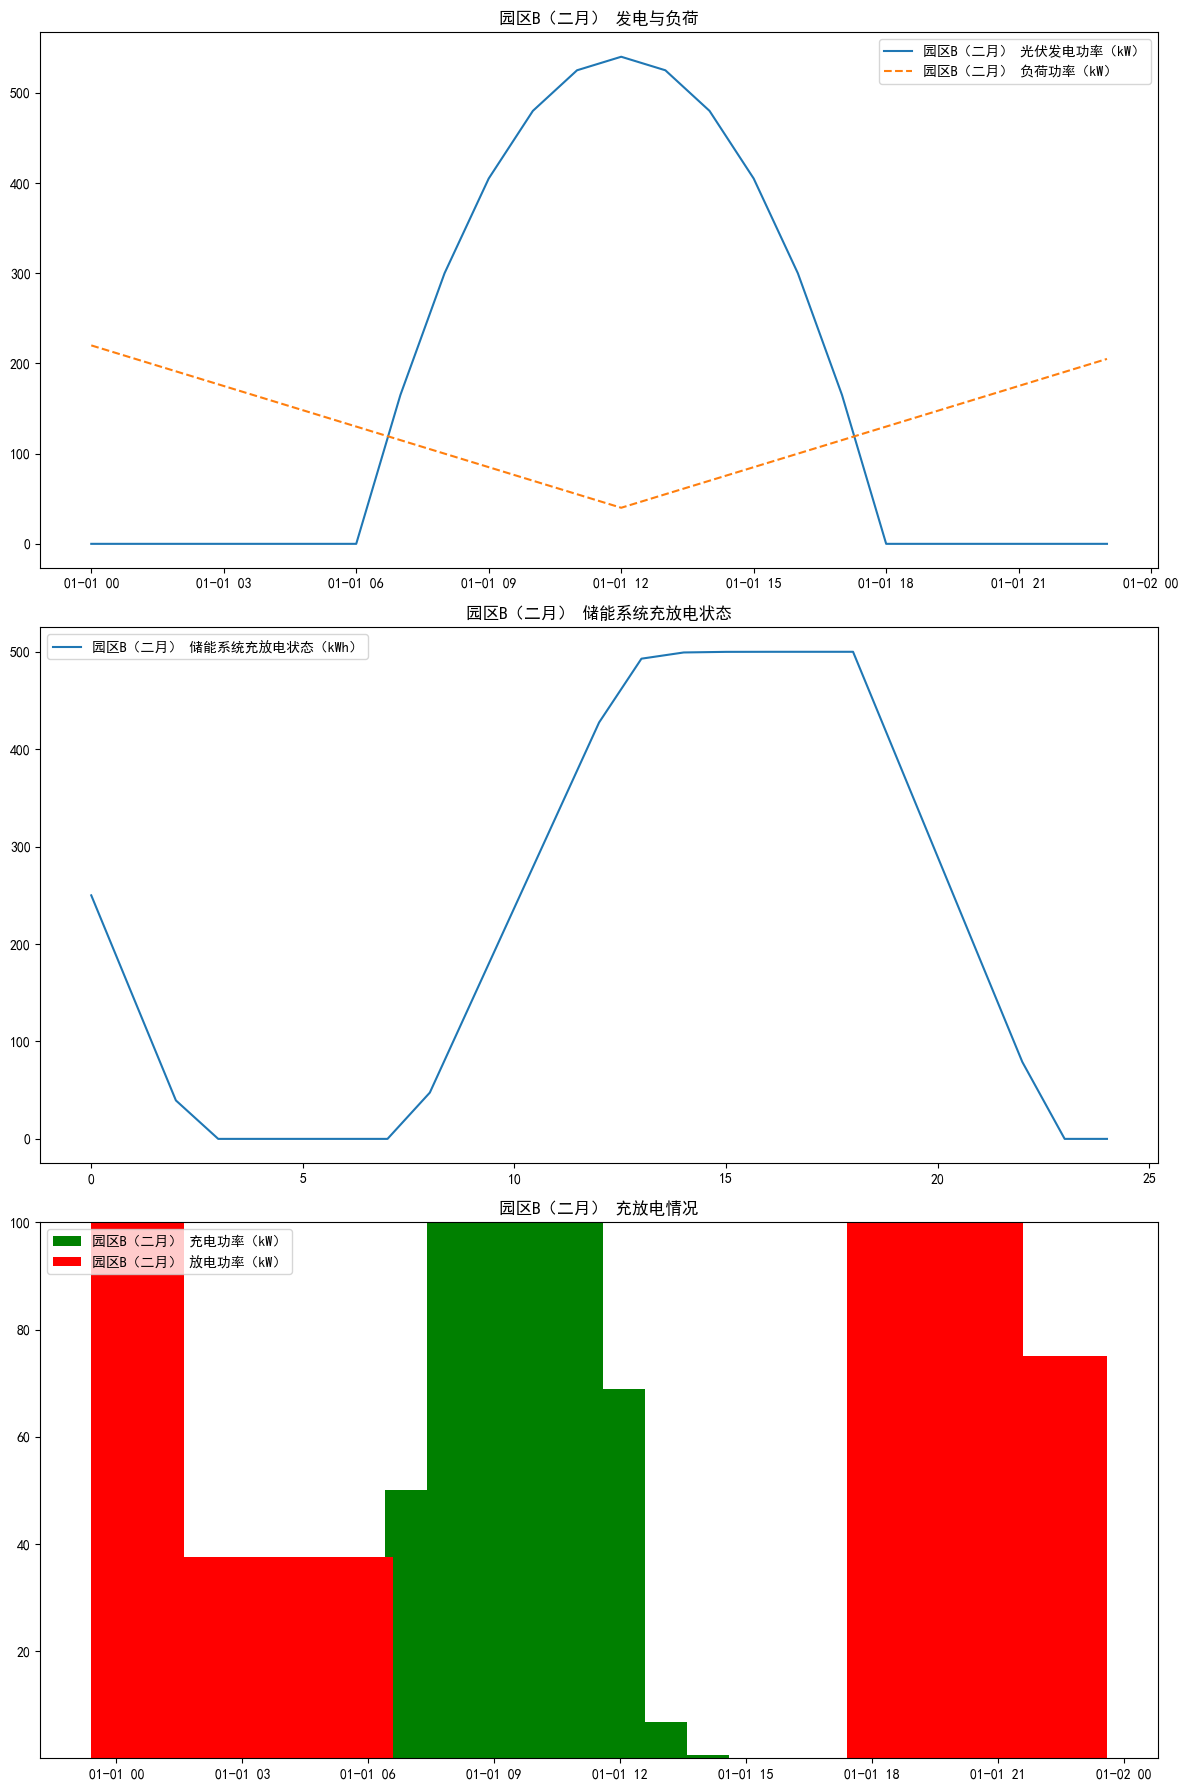

园区B（二月） 总成本: 733.0000236673318


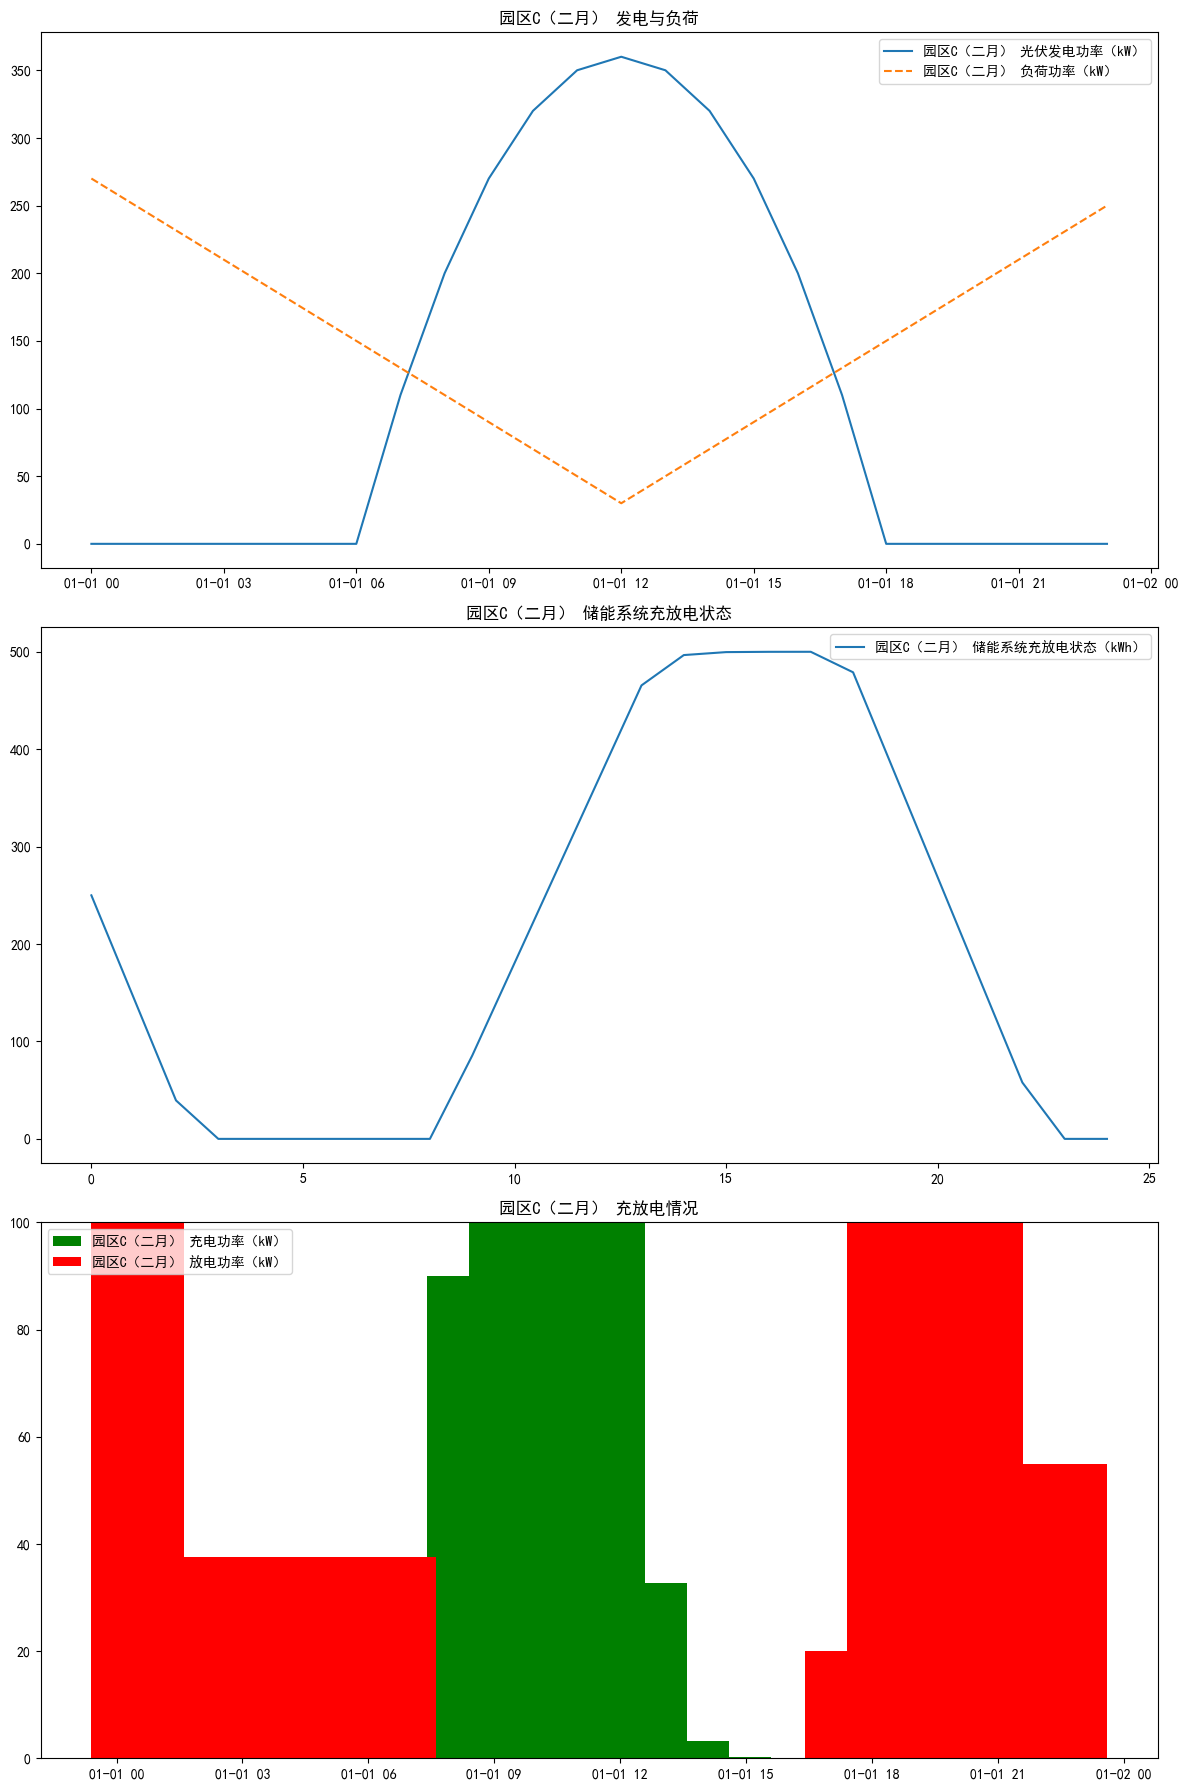

园区C（二月） 总成本: 1003.0011847348246


In [27]:

generation_a2 = [max(20 * (i - 6) * (18 - i), 0) for i in range(24)]  # 假设光伏发电曲线不变
generation_b2 = [max(15 * (i - 6) * (18 - i), 0) for i in range(24)]
generation_c2 = [max(10 * (i - 6) * (18 - i), 0) for i in range(24)]
load_a2 = [50 + 10 * abs(i - 12) for i in range(24)]  # 假设负荷模式不变
load_b2 = [40 + 15 * abs(i - 12) for i in range(24)]
load_c2 = [30 + 20 * abs(i - 12) for i in range(24)]

# 将数据转换为pandas Series
park_a_feb_pv = pd.Series(generation_a2, index=data_hours)
park_b_feb_pv = pd.Series(generation_b2, index=data_hours)
park_c_feb_pv = pd.Series(generation_c2, index=data_hours)
load_a_feb = pd.Series(load_a2, index=data_hours)
load_b_feb = pd.Series(load_b2, index=data_hours)
load_c_feb = pd.Series(load_c2, index=data_hours)

# 模拟第二个月
simulate_and_plot(park_a_feb_pv, load_a_feb, "园区A（二月）")
simulate_and_plot(park_b_feb_pv, load_b_feb, "园区B（二月）")
simulate_and_plot(park_c_feb_pv, load_c_feb, "园区C（二月）")
